In [1]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import cv2
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
batch_size=16
epochs=10
input_shape=(256,256,3)
num_classes=2

In [3]:
dataset_path = '/kaggle/input/chest-xray-pneumonia/chest_xray'

In [4]:
#CREATING A MODEL
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_generator = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    batch_size=16,target_size=(256,256),class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    batch_size=16,target_size=(256,256),class_mode='binary')

Found 16 images belonging to 2 classes.


In [10]:
testing_generator  = validation_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
batch_size=16,target_size=(256,256),class_mode='binary')

Found 624 images belonging to 2 classes.


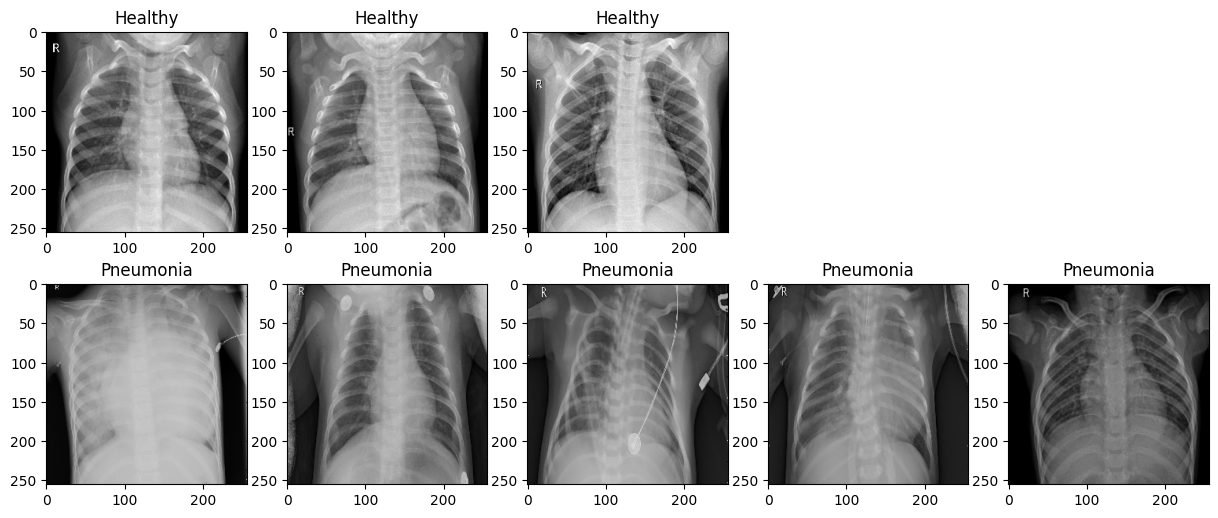

In [11]:
num_images_to_display = 5
images, labels = training_generator.next()

healthy_images = images[labels == 0]
pneumonia_images = images[labels == 1]

num_healthy = min(num_images_to_display, len(healthy_images))
num_pneumonia = min(num_images_to_display, len(pneumonia_images))

healthy_images = healthy_images[:num_healthy]
pneumonia_images = pneumonia_images[:num_pneumonia]

plt.figure(figsize=(15, 6))
for i in range(max(num_healthy, num_pneumonia)):
    if i < num_healthy:
        plt.subplot(2, num_images_to_display, i + 1)
        plt.imshow(healthy_images[i])
        plt.title("Healthy")

    if i < num_pneumonia:
        plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
        plt.imshow(pneumonia_images[i])
        plt.title("Pneumonia")


In [12]:
history = model.fit(training_generator,steps_per_epoch=training_generator.samples//batch_size,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=validation_generator.samples//batch_size)

Epoch 1/10
326/326 [==============================] - 83s 217ms/step - loss: 0.2443 - accuracy: 0.9049 - val_loss: 0.2976 - val_accuracy: 0.8750
Epoch 2/10
326/326 [==============================] - 47s 144ms/step - loss: 0.1102 - accuracy: 0.9605 - val_loss: 0.3564 - val_accuracy: 0.8750
Epoch 3/10
326/326 [==============================] - 49s 149ms/step - loss: 0.0813 - accuracy: 0.9703 - val_loss: 0.1647 - val_accuracy: 0.8750
Epoch 4/10
326/326 [==============================] - 47s 145ms/step - loss: 0.0738 - accuracy: 0.9709 - val_loss: 0.2151 - val_accuracy: 0.8750
Epoch 5/10
326/326 [==============================] - 50s 153ms/step - loss: 0.0634 - accuracy: 0.9781 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 6/10
326/326 [==============================] - 49s 150ms/step - loss: 0.0518 - accuracy: 0.9814 - val_loss: 0.2464 - val_accuracy: 0.8750
Epoch 7/10
326/326 [==============================] - 48s 146ms/step - loss: 0.0371 - accuracy: 0.9860 - val_loss: 0.0326 - val_ac

In [13]:
test_loss,test_accuracy=model.evaluate(testing_generator)
print(f'Accuracy on the test dataset is {test_accuracy*100:.2f}%')

39/39 [==============================] - 8s 193ms/step - loss: 3.0522 - accuracy: 0.7420
Accuracy on the test dataset is 74.20%


In [14]:
from tensorflow.keras.preprocessing import image
def img_predict(image_path):
    img = image.load_img(image_path,target_size=input_shape)
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img /=255.0
    prediction = model.predict(img)
    predicted_condition_index = np.argmax(prediction)
    
    return predicted_condition_index

In [15]:
disease_mapping={0: 'Pneumonia',
                1: 'Normal'}

In [16]:
image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'

In [17]:
predicted_image_index=img_predict(image_path)
predicted_condition_name=disease_mapping.get(predicted_image_index,'Unknown')
print(f'Predicted condition {predicted_condition_name}')

1/1 [==============================] - 0s 304ms/step
Predicted condition Pneumonia


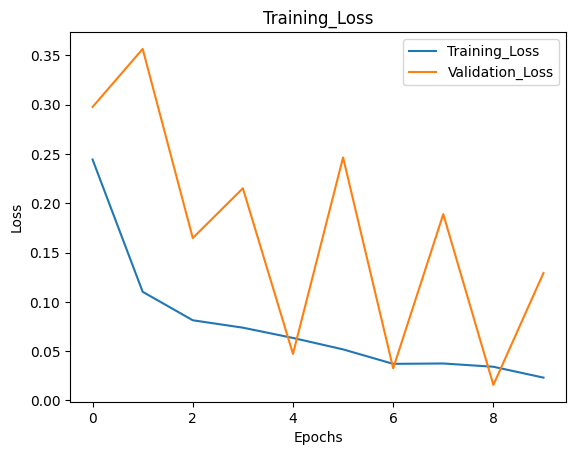

In [18]:
#plotting Training Loss
plt.plot(history.history['loss'],label='Training_Loss')
plt.plot(history.history['val_loss'],label='Validation_Loss')
plt.title('Training_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

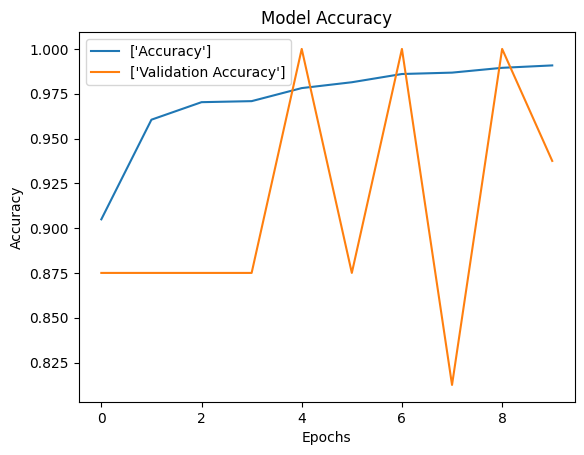

In [19]:
#Plotting Training Accuracy
plt.plot(history.history['accuracy'],label=['Accuracy'])
plt.plot(history.history['val_accuracy'],label=['Validation Accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [20]:

# Get the true labels
num_samples = len(testing_generator.filenames)
num_classes = len(testing_generator.class_indices)
y_true = testing_generator.classes
# Make predictions
y_pred_probs = model.predict(testing_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

39/39 [==============================] - 5s 128ms/step


In [21]:
testing_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

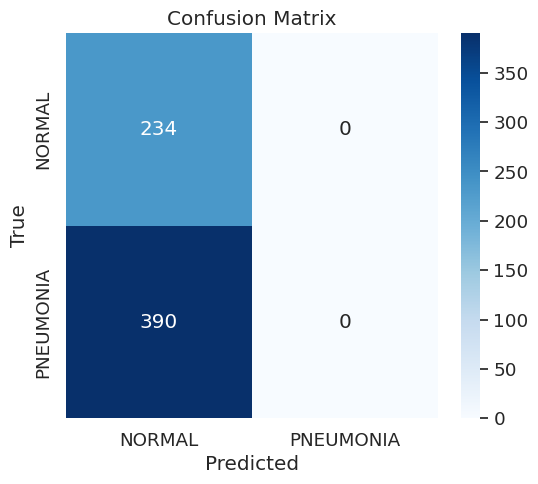

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['NORMAL','PNEUMONIA']
# Create a heatmap
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Creating a model using Transfer Learning - VGG16**

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top layers (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Add custom fully connected layers on top of the VGG16 base
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Example output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Example data preprocessing steps (replace with your actual data preprocessing)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # For binary classification, adjust for your problem
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # For binary classification, adjust for your problem
)

# Train the model
history=model.fit(train_generator, epochs=10, validation_data=validation_generator)


58889256/58889256 [==============================] - 0s 0us/step
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 60s 332ms/step - loss: 0.1907 - accuracy: 0.9442 - val_loss: 0.9582 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 52s 320ms/step - loss: 0.0425 - accuracy: 0.9845 - val_loss: 0.7138 - val_accuracy: 0.8109
Epoch 3/10
163/163 [==============================] - 53s 322ms/step - loss: 0.0242 - accuracy: 0.9906 - val_loss: 0.7140 - val_accuracy: 0.8285
Epoch 4/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0245 - accuracy: 0.9914 - val_loss: 0.6569 - val_accuracy: 0.8429
Epoch 5/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0229 - accuracy: 0.9908 - val_loss: 1.2895 - val_accuracy: 0.7788
Epoch 6/10
163/163 [==============================] - 52s 316ms/step - loss: 0.0178 - accuracy: 0.9935 - val_loss: 1.7287 - val

In [25]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

20/20 [==============================] - 5s 259ms/step


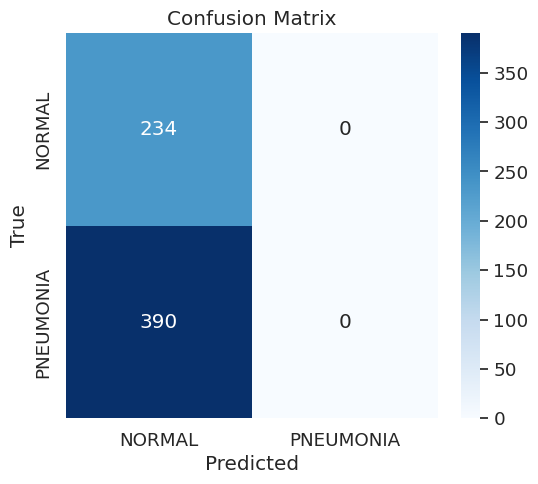

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['NORMAL','PNEUMONIA']
# Create a heatmap
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

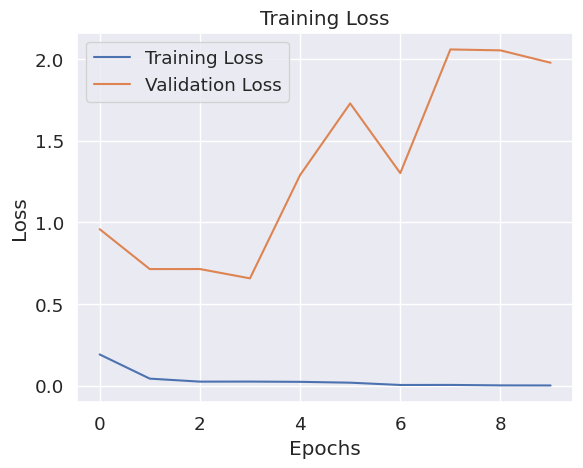

In [27]:
#Plotting Training Loss
plt.plot(history.history['loss'],label='Training Loss')
#Plotting Validation loss
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

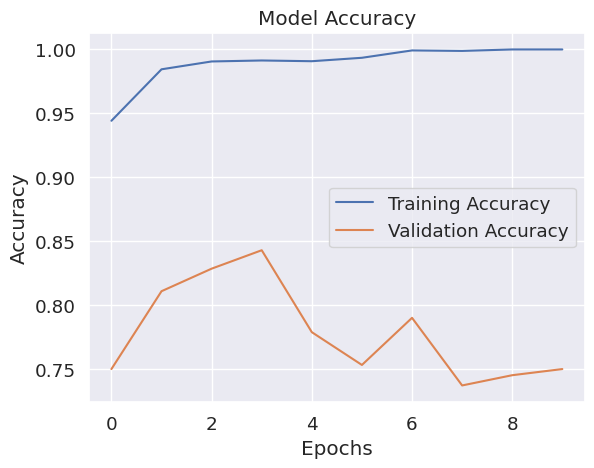

In [29]:
# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history3 = model.fit(train_generator, epochs=15,validation_data=test_generator, callbacks=[early_stopping])


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/15
163/163 [==============================] - 83s 433ms/step - loss: 1.3816 - accuracy: 0.7314 - val_loss: 0.6652 - val_accuracy: 0.6250
Epoch 2/15
163/163 [==============================] - 70s 429ms/step - loss: 0.5588 - accuracy: 0.7498 - val_loss: 1.3466 - val_accuracy: 0.6250
Epoch 3/15
163/163 [==============================] - 71s 432ms/step - loss: 0.6721 - accuracy: 0.7320 - val_loss: 1.0680 - val_accuracy: 0.6250
Epoch 4/15
163/163 [==============================] - 70s 426ms/step - loss: 0.5952 - accuracy: 0.7322 - val_loss: 0.6696 - val_accuracy: 0.6250


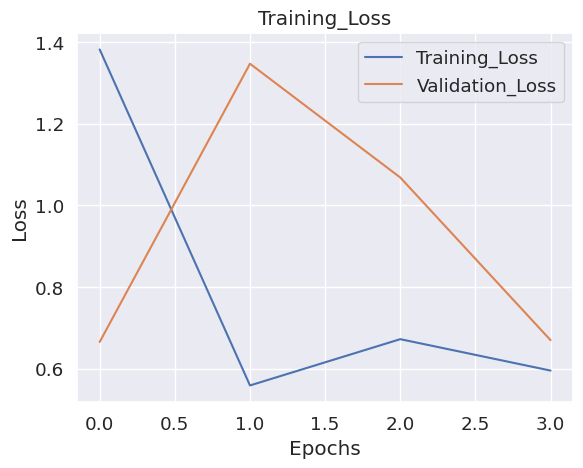

In [32]:
#plotting Training Loss
plt.plot(history3.history['loss'],label='Training_Loss')
plt.plot(history3.history['val_loss'],label='Validation_Loss')
plt.title('Training_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

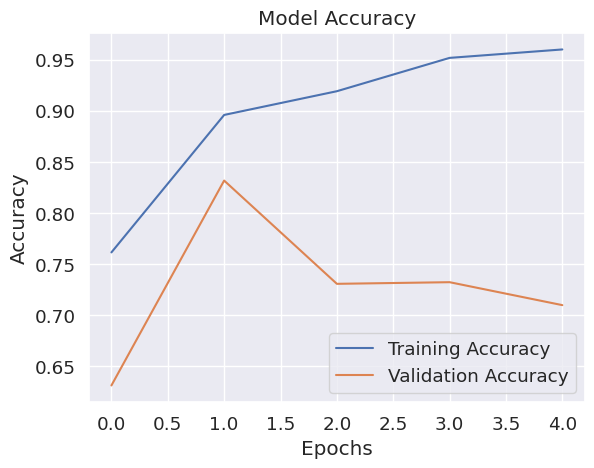

In [43]:
# Plotting training accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Creating a model using Dropout Layer**

In [68]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
optimizer = legacy.Adam(learning_rate=0.001)

In [69]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [70]:


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)



In [71]:


# Load and preprocess the data
train_generator = train_datagen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 5216 images belonging to 2 classes.


In [72]:

val_generator = val_datagen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/val',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary')


Found 16 images belonging to 2 classes.


In [73]:
history=model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
163/163 [==============================] - 109s 665ms/step - loss: 0.2774 - accuracy: 0.9051 - val_loss: 0.4675 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 107s 655ms/step - loss: 0.1202 - accuracy: 0.9555 - val_loss: 0.3898 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 108s 660ms/step - loss: 0.1043 - accuracy: 0.9617 - val_loss: 0.2502 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 107s 659ms/step - loss: 0.0877 - accuracy: 0.9678 - val_loss: 0.3194 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 107s 658ms/step - loss: 0.0804 - accuracy: 0.9686 - val_loss: 0.2975 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 107s 656ms/step - loss: 0.0770 - accuracy: 0.9726 - val_loss: 0.1997 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 108s 661ms/step - loss: 0.0846 - accuracy: 0.9657 - val_loss: 0.2130 -

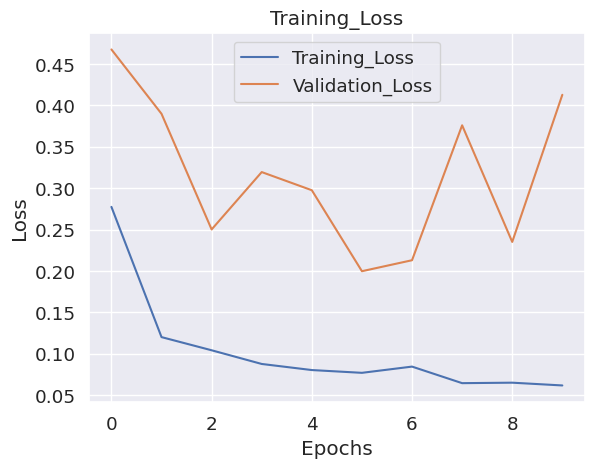

In [83]:
#plotting Training Loss
plt.plot(history.history['loss'],label='Training_Loss')
plt.plot(history.history['val_loss'],label='Validation_Loss')
plt.title('Training_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

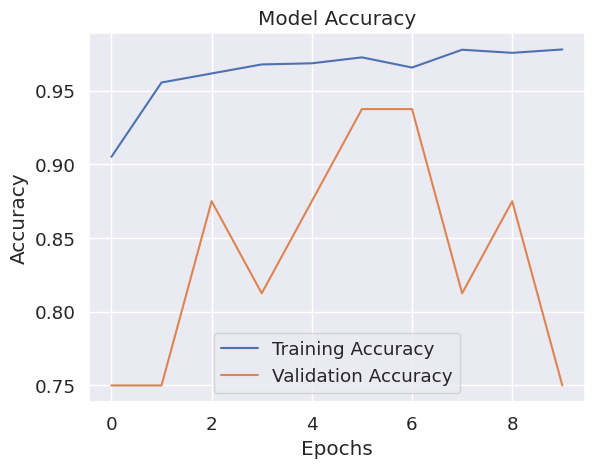

In [84]:
# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [85]:
test_loss,test_accuracy=model.evaluate(test_generator)
print(f'The model accuracy is {test_accuracy}')

20/20 [==============================] - 5s 245ms/step - loss: 0.3931 - accuracy: 0.8910
The model accuracy is 0.8910256624221802


In [86]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

20/20 [==============================] - 5s 242ms/step


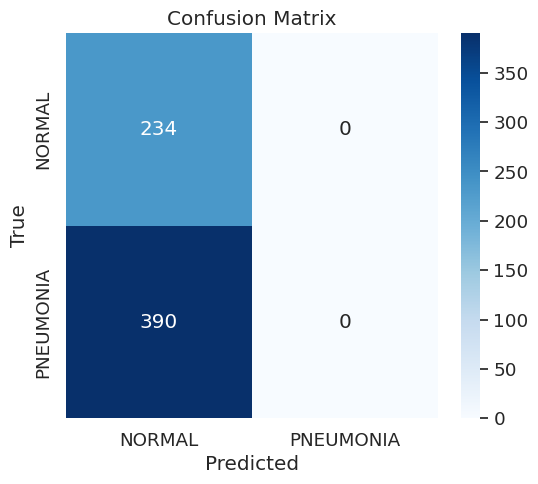

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['NORMAL','PNEUMONIA']
# Create a heatmap
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [88]:
y_test=test_generator.classes
y_pred_probs=model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
print("Classification Report:")
print(classification_report(y_true,y_pred))

20/20 [==============================] - 5s 249ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
def predict_image(image_path, model, image_size=(224, 224)):
    img = image.load_img(image_path, target_size=image_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize

    prediction = model.predict(img)
    return "Normal" if prediction < 0.5 else "Pneumonia"

In [90]:
img_path='/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'

In [91]:
predict_image(img_path,model)

1/1 [==============================] - 0s 21ms/step


'Pneumonia'

In [57]:
model.save('pneumonia.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
